# Entraînez-vous en générant des cartes de vœux avec Pandas
[Lien vers l'exercice](https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/6734606-entrainez-vous-en-generant-des-cartes-de-voeux-avec-pandas)

In [118]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Chargement des données

In [98]:
births = pd.read_csv('data/births.txt', sep=',')
births.describe()

year         month           day         births
count  15547.000000  15547.000000  15067.000000   15547.000000
mean    1979.037435      6.515919     17.769894    9762.293561
std        6.728340      3.449632     15.284034   28552.465810
min     1969.000000      1.000000      1.000000       1.000000
25%     1974.000000      4.000000      8.000000    4358.000000
50%     1979.000000      7.000000     16.000000    4814.000000
75%     1984.000000     10.000000     24.000000    5289.500000
max     2008.000000     12.000000     99.000000  199622.000000

## Vérification et transformation des données

### Nettoyage des colonnes incomplètes
Dans notre cas on a besoin de pouvoir, pour chaque ligne : 
* Créer un objet date => avoir l'année, le mois et le jour afin d'en tirer le jour de la semaine
* Avoir un nombre de naissances valide : sinon **on se base sur le jour précédent** pour avoir une moyenne

Note : on ne prend pas le risque de recréer une date à partir de la ligne précédente au cas où des dates manquerait dans le fichier, cela nous ferait créer des "trous" et des approximations négatives.

In [99]:
# On remplace chaque NA births par la valeur précédente
births.births.fillna(method="pad", inplace=True)

# On supprime toutes les lignes où la date n'est pas complète (mais un genre manquant ne nous gène pas)
births.dropna(subset=["year", "month", "day"], inplace=True)
births.describe()

year         month           day        births
count  15067.000000  15067.000000  15067.000000  15067.000000
mean    1978.417402      6.516427     17.769894   4678.631513
std        5.762018      3.449554     15.284034   1003.104707
min     1969.000000      1.000000      1.000000      1.000000
25%     1973.000000      4.000000      8.000000   4344.000000
50%     1978.000000      7.000000     16.000000   4785.000000
75%     1983.000000     10.000000     24.000000   5247.000000
max     1988.000000     12.000000     99.000000   6527.000000

On a donc **perdu 480 lignes** pour cause de date invalide.

Vérifions maintenant les années, mois et jour pour s'assurer qu'on n'a pas de valeurs bizarres.

In [100]:
# Les années semblent bonnes
print("Années : \n" + str(births.year.unique()))

# Les mois sont bons également
print("Mois : \n" + str(births.month.unique()))

# Les jours sont en float, et surtout la valeur 99 semble étonnantes
print("Jours : \n" + str(births.day.unique()))

# On filtre donc cette donnée bizarre et on convertit la colonne en int
births = births[births["day"] != 99]
births.day = births.day.astype(int)
print("Jours nettoyés : \n" + str(births.day.unique()))

Années : 
[1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988]
Mois : 
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Jours : 
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 99.]
Jours nettoyés : 
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


### Conversion des dates et calcul du jour de la semaine

In [133]:
# On crée une colonne de dates
# L'option 'coerce' pour les erreurs dit à pandas qu'on veut que les erreurs de date soit converti en NaT
births["date"] = pd.to_datetime(births.year * 10000 + births.month * 100 + births.day, format='%Y%m%d', errors='coerce')

# Ce qui nous permet de droper les lignes avec une mauvaise date
births.dropna(subset=["date"], inplace=True)

# On récupère alors le jour de la semaine
births["weekday"] = births.date.dt.weekday
births

year  month  day gender  births       date  weekday
0      1969      1    1      F    4046 1969-01-01        2
1      1969      1    1      M    4440 1969-01-01        2
2      1969      1    2      F    4454 1969-01-02        3
3      1969      1    2      M    4548 1969-01-02        3
4      1969      1    3      F    4548 1969-01-03        4
...     ...    ...  ...    ...     ...        ...      ...
15062  1988     12   29      M    5944 1988-12-29        3
15063  1988     12   30      F    5742 1988-12-30        4
15064  1988     12   30      M    6095 1988-12-30        4
15065  1988     12   31      F    4435 1988-12-31        5
15066  1988     12   31      M    4698 1988-12-31        5

[14610 rows x 7 columns]

## Utilisation des données
### Aggrégation des données

In [134]:
# On commence par fait notre tranches d'âges
years = pd.cut(births['year'], [1960, 1970, 1980, 1990])

# Et on fait un tableau croisé dynamique pour avoir notre résultat final
results = births.pivot_table('births', 'weekday', years, aggfunc="sum")
results

year     (1960, 1970]  (1970, 1980]  (1980, 1990]
weekday                                          
0             1072594       4882617       4416584
1             1123488       5074669       4615642
2             1090704       4941667       4501015
3             1066176       4885094       4483536
4             1078904       4982204       4532122
5              982794       4358362       3750348
6              918524       4137862       3590602

### Mise sous forme de graphique

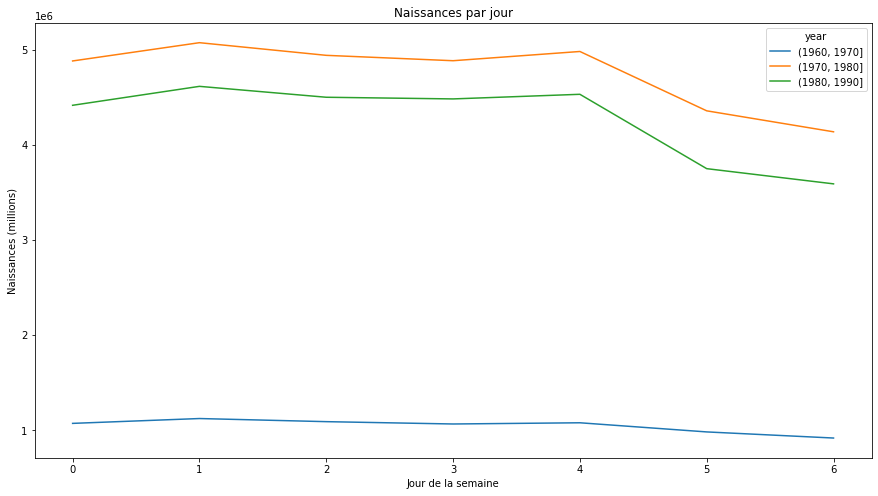

In [150]:
lines = results.plot.line(xlabel="Jour de la semaine", 
                          ylabel="Naissances (millions)", 
                          title="Naissances par jour",
                          figsize=(15,8))